In [76]:
import pandas as pd

# Load the initial dataset
file_path = 'final_dataset.csv'
df = pd.read_csv(file_path)

In [77]:
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data = df.copy()
# Sample categorical and numerical features
categorical_features = ['Education', 'Language', 'IDE', 'Course_platform', 'ML_algorithm', 'Related_activities']  
numerical_features = ['Age', 'Years_of_programming', 'Years_of_machine_learning', 'Company_size', 'Yearly_compensation']  

# One-Hot Encoding for Multi-Answer Categorical Features
mlb = MultiLabelBinarizer()
for feature in categorical_features:
    # Splitting each feature into a list of items
    data[feature] = data[feature].str.split(', ').apply(lambda x: [item.strip() for item in x])
    # Applying MultiLabelBinarizer
    encoded_features = pd.DataFrame(mlb.fit_transform(data[feature]), columns=mlb.classes_)
    # Drop the original column and add the encoded columns
    data = data.drop(columns=[feature])
    data = pd.concat([data, encoded_features], axis=1)

# Normalize Numerical Features
scaler = MinMaxScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [78]:
#data.to_csv('dataset.csv', index=False)
data = data.drop('Other', axis=1)
data = data.loc[:, ~data.columns.duplicated()]
data = data.drop(columns=['analyzing', 'and operationalizing data'])
#duplicate_columns = data.columns.duplicated()
#duplicate_column_names = data.columns[duplicate_columns].tolist()
#data=data.drop(columns=duplicate_column_names)

In [79]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Job'] = label_encoder.fit_transform(data['Job'])
# Splitting the Dataset
X = data.drop(columns=['Job'])  
y = data['Job']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

y_pred_gbm = gbm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gbm)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# reverse labels
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# predict
y_true_names = [reverse_label_mapping[i] for i in y_test]
y_pred_names = [reverse_label_mapping[i] for i in y_pred_gbm]

# print out report
report = classification_report(y_true_names, y_pred_names)
print("Accuracy:", accuracy)
print(report)

Accuracy: 0.5888423988842398
                           precision    recall  f1-score   support

           Data Scientist       0.60      0.70      0.65      1340
              DataAnalyst       0.50      0.53      0.52       597
Machine Learning Engineer       0.47      0.28      0.35       459
       Research Scientist       0.62      0.54      0.57       507
        Software Engineer       0.68      0.66      0.67       682

                 accuracy                           0.59      3585
                macro avg       0.57      0.54      0.55      3585
             weighted avg       0.58      0.59      0.58      3585



In [81]:
import pickle

# Save the trained model to a file
with open('gbm_model.pkl', 'wb') as model_file:
    pickle.dump(gbm_model, model_file)

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = df.copy()

# Getting the distribution of classes in the training set
class_distribution = y_train.value_counts(normalize=True)

# Generating random predictions based on class distribution
random_predictions = np.random.choice(class_distribution.index, size=len(y_test), p=class_distribution.values)

random_report = classification_report(y_test, random_predictions, target_names=label_encoder.classes_)
# Evaluating the random model
print(random_report)


                           precision    recall  f1-score   support

           Data Scientist       0.37      0.37      0.37      1340
              DataAnalyst       0.17      0.18      0.17       597
Machine Learning Engineer       0.11      0.12      0.12       459
       Research Scientist       0.12      0.11      0.11       507
        Software Engineer       0.20      0.19      0.19       682

                 accuracy                           0.23      3585
                macro avg       0.19      0.19      0.19      3585
             weighted avg       0.24      0.23      0.23      3585



Text(0.5, 1.0, 'Random Decision Report')

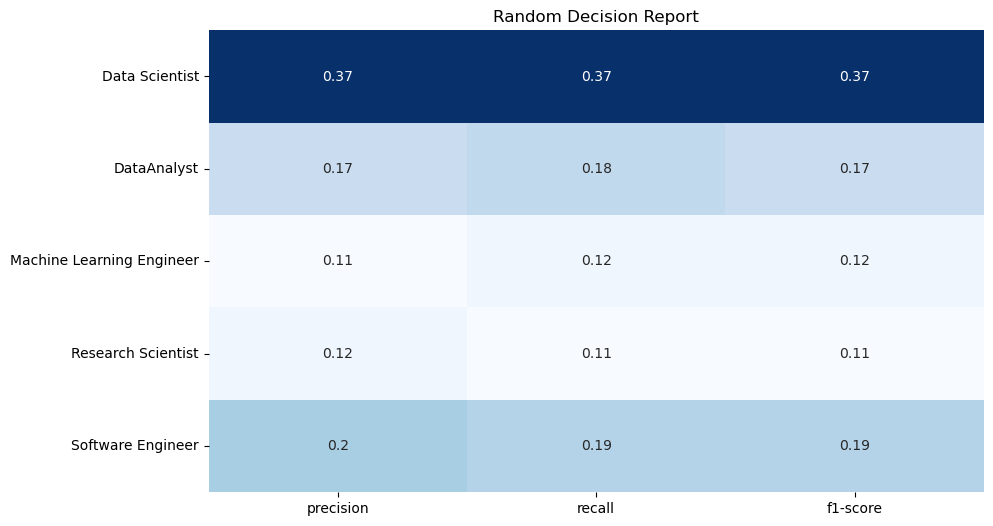

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the report dictionary to a DataFrame
random_report = classification_report(y_test, random_predictions, target_names=label_encoder.classes_, output_dict=True)


# Convert the report to a DataFrame
report_df = pd.DataFrame(random_report).transpose()

# Drop the last three rows: 'accuracy', 'macro avg', 'weighted avg'
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

# Round off the values
report_df = report_df.round(2)

# Exclude 'support' column if present
if 'support' in report_df.columns:
    report_df = report_df.drop(columns='support')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('Random Decision Report')


Text(0.5, 1.0, 'GBM Report')

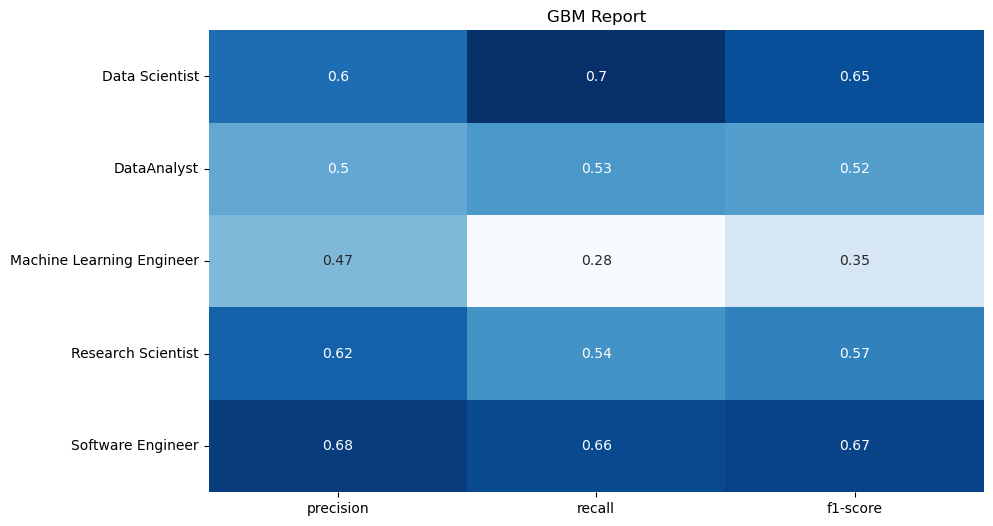

In [84]:
# Convert the report dictionary to a DataFrame
report = classification_report(y_true_names, y_pred_names, output_dict=True)


# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Drop the last three rows: 'accuracy', 'macro avg', 'weighted avg'
report_df = report_df.drop(index=['accuracy', 'macro avg', 'weighted avg'])

# Round off the values
report_df = report_df.round(2)

# Exclude 'support' column if present
if 'support' in report_df.columns:
    report_df = report_df.drop(columns='support')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df, annot=True, cmap='Blues', cbar=False, fmt='g')
plt.title('GBM Report')


In [10]:
counts_of_ones = {col: (data[col] == 1).sum() for col in data.columns}


In [16]:
all_features = set(','.join(df['Course_platform']).split(','))
all_features

{' Cloud-certification programs ',
 ' DataCamp',
 ' Fast.ai',
 ' Kaggle Learn Courses',
 ' LinkedIn Learning',
 ' Other',
 ' Udacity',
 ' Udemy',
 ' University Courses ',
 ' edX',
 'Cloud-certification programs ',
 'Coursera',
 'DataCamp',
 'Fast.ai',
 'Kaggle Learn Courses',
 'LinkedIn Learning',
 'Other',
 'Udacity',
 'Udemy',
 'University Courses ',
 'edX'}

In [26]:
df['Yearly_compensation'].unique()

array([ 137500,   75000,     500,  175000,   65000,   12500,   17500,
          4500,  500000,   27500,   85000,   45000,    8750,  112500,
        275000,   55000,   35000,    2500,    6250,   22500,  225000,
        400000,    1500,   95000,    3500,  750000, 1000000], dtype=int64)

In [82]:
data.columns

Index(['Age', 'Job', 'Years_of_programming', 'Years_of_machine_learning',
       'Company_size', 'Yearly_compensation', 'Bachelor’s degree',
       'Doctoral degree', 'Master’s degree',
       'No formal education past high school', 'Professional degree',
       'Professional doctorate',
       'Some college/university study without earning a bachelor’s degree',
       'Bash', 'C', 'C#', 'C++', 'Go', 'Java', 'Javascript', 'Julia', 'MATLAB',
       'None', 'PHP', 'Python', 'R', 'SQL', 'Swift', 'IntelliJ', 'Jupyter',
       'Notepad++', 'PyCharm', 'RStudio', 'Spyder', 'Sublime Text',
       'Vim / Emacs', 'Visual Studio', 'Visual Studio Code',
       'Cloud-certification programs', 'Coursera', 'DataCamp', 'Fast.ai',
       'Kaggle Learn Courses', 'LinkedIn Learning', 'Udacity', 'Udemy',
       'University Courses', 'edX', 'Autoencoder Networks',
       'Bayesian Approaches', 'Convolutional Neural Networks',
       'Decision Trees or Random Forests', 'Dense Neural Networks',
       'Evolu

In [35]:
label_mapping

{'Data Scientist': 0,
 'DataAnalyst': 1,
 'MachineLearningEngineer': 2,
 'Research Scientist': 3,
 'Software Engineer': 4,
 'Statistician': 5}

In [36]:
reverse_label_mapping = {v: k for k, v in label_mapping.items()}
reverse_label_mapping

{0: 'Data Scientist',
 1: 'DataAnalyst',
 2: 'MachineLearningEngineer',
 3: 'Research Scientist',
 4: 'Software Engineer',
 5: 'Statistician'}